# Test A Perceptual Phenomenon: Stroop Effect

## Introduction:

The Stroop effect (named after John Ridley Stroop who first published the effect in English in 1935) is the delay in reaction time between congruent and incongruent stimuli.  Psychologists have created a psychological test, the Stroop test, that is widely used in clinical practice and investigation.

A demonstration of this effect is as follows:

Participants are presented with a list of words.  Each word is displayed in a color.  The participant must say out loud the color of the displayed words.  Two conditions exist:

1. Words are colored according to their names (e.g. the word RED would be colored red) - this is the congruent condition.
2. Words are *not* colored according to their names (e.g. the word RED would be colored in any color other than red) - this is called the incongruent condition.

For each participant the response time to name the colors of the words in equally-sized lists is measured and recorded.

## Questions For Investigation:

### 1. What is our independent variable? What is our dependent variable?

An independent variable is the variable you manipulate or vary in an experimental study.  It is called independent because it is not influenced by any other variable in the study.  Our independent variable is the color/word combinations.

A dependent variable is the variable that changes as a result of the independent variable manipulation. It is the outcome you are interested in measuring. Our dependent variable is the time taken to name the correct color.

### 2. What is an appropriate set of hypotheses for this task? What kind of statistical test do you expect to perform? Justify your choices.

Let:

- $\mu$<sub>1</sub> = Mean time to answer correctly for the congruent words condition.
- $\mu$<sub>2</sub> = Mean time to answer correctly for the incongruent words condition.

Our hypotheses are:

- H<sub>0</sub>: ($\mu$<sub>1</sub> = $\mu$<sub>2</sub>) There will be no change in population mean times between congruent and incongruent word lists.
- H<sub>a</sub>: ($\mu$<sub>1</sub> $\neq$ $\mu$<sub>2</sub>) There will be a change in population mean times between congruent and incongruent word lists.

A paired t-test with a confidence interval of 99% (we reject the null hypothesis if the p-value is less than 0.01) is the statistical test of choice.  This is the appropriate test because:

- We are comparing results from two similar tests using the same participants.
- This is a small sample size (less than thirty) - a z-test would be appropriate for a larger sample size.
- We are comparing the means of related sample data (not the equality between two populations), so an f-test is not appropriate.

For the results of a paired t-test to be trusted:

- The observations are independent.
- The data must be continuous when measured on a ratio or interval scale.
- The data should be roughly normal distributed - as long as there is not a major violation of normality, the paired sample t-test is robust to violations of this assumption.

### 3. Report some descriptive statistics regarding this dataset. Include at least one measure of central tendency and at least one measure of variability.

In [7]:
import pandas as pd

# Making data frame.
stroop_data_df = pd.read_csv('stroopdata.csv')

# Show the complete Stroop dataset.
display(stroop_data_df)

,Congruent,Incongruent
0,12.079,19.278
1,16.791,18.741
2,9.564,21.214
3,8.630,15.687
4,14.669,22.803
5,12.238,20.878
6,14.692,24.572
7,8.987,17.394
8,9.401,20.762
9,14.480,26.282


The complete Stroop dataset is shown above.

Here are some descriptive statistics for the dataset, including at least one measurement of tendency and variability:

In [61]:
# Show at least one measurement of central tendency.
mean = stroop_data_df.mean()
median = stroop_data_df.median()
print('\nMean:\n', mean, '\n\nMedian:\n', median, '\n')


Mean:
 Congruent      14.051125
Incongruent    22.015917
dtype: float64 

Median:
 Congruent      14.3565
Incongruent    21.0175
dtype: float64 



In [59]:
# Show at least one measurement of variability.
standard_deviation = stroop_data_df.std()
variance = stroop_data_df.var()
print('\nStandard Deviation:\n', standard_deviation, '\n\nVariance:\n', variance)


Standard Deviation:
 Congruent      3.559358
Incongruent    4.797057
dtype: float64 

Variance:
 Congruent      12.669029
Incongruent    23.011757
dtype: float64


The data is not centered around the median so it has a good spread.

### 4. Provide one or two visualizations that show the distribution of the sample data. Write one or two sentences noting what you observe about the plot or plots.

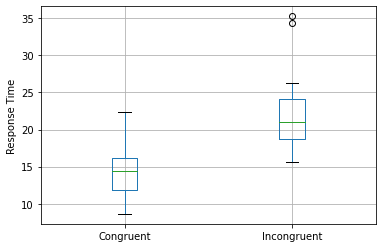

In [71]:
import matplotlib.pyplot as plot

# Plot a box plot to show the two sets of data on the same graph.
stroop_data_df.boxplot()
plot.ylabel('Response Time')
plot.show()

This box plot shows that many of the response times in the incongruent tests were longer than the response times in the congruent tests. We also see some outliers in the incongruent response times.

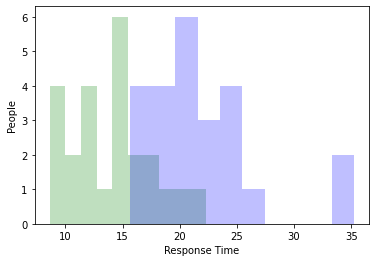

In [91]:
plot.hist(stroop_data_df['Congruent'], color = 'green', alpha = 0.25)
plot.hist(stroop_data_df['Incongruent'], color = 'blue', alpha = 0.25)
plot.xlabel('Response Time')
plot.ylabel('People')
plot.show()

This histogram shows congruent and incongruent variables and the response time to correctly answer the color.  Note there are two outliers in the 34/35 range on the histogram for the incongruent variable.

### 5. Now, perform the statistical test and report your results. What is your confidence level and your critical statistic value? Do you reject the null hypothesis or fail to reject it? Come to a conclusion in terms of the experiment task. Did the results match up with your expectations?

In [88]:
# Perform a paired sample t-test.
from scipy import stats

t_value, p_value = stats.ttest_rel(stroop_data_df.Congruent, stroop_data_df.Incongruent)
print("t-distribution = %g" % t_value)
print("p-value = %g" % p_value)

t-distribution = -8.02071
p-value = 4.103e-08


Note that our alternative hypothesis is one-tailed whereas we have returned a two-tailed p-value.  Dividing the p-value by two before comparing it to our selected confidence interval is required:

In [90]:
# Adjust the p-value.
adjusted_p_value = p_value / 2
print("Adjusted p-value = %g" % adjusted_p_value)

Adjusted p-value = 2.0515e-08


Since the adjusted value is less than 0.01, the null hypothesis can be rejected and the alternative hypothesis can be accepted.

### 6. Optional: What do you think is responsible for the effects observed? Can you think of an alternative or similar task that would result in a similar effect? Some research about the problem will be helpful for thinking about these two questions!